In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from tqdm import tqdm

In [ ]:
!cp "/content/drive/MyDrive/KLEEMANN/2_year_samples.xlsx" "/content"

In [ ]:
class KleemannDataset(Dataset):
    def __init__(self, pressure_ts, seq_length=15, mean=0, std=1.0):
        self.data = torch.tensor(pressure_ts, dtype=torch.float)        
        self.data = (self.data - mean) / std
        self.seq_length = seq_length
        
    def __len__(self):
        return len(self.data) - self.seq_length - 1
    
    def __getitem__(self, i):
        return self.data[i:(i + self.seq_length)], self.data[i + self.seq_length]

In [ ]:
class RegressionNN(nn.Module):
    def __init__(self, device, seq_length, hidden_units):
        super().__init__()
        self.seq_length = seq_length
        self.linear1 = nn.Linear(seq_length, 32)
        self.linear2 = nn.Linear(32, 64)
        self.linear3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        y = self.linear3(x)
        return y

In [ ]:
# Define xlsx filename
filename = "/content/2_year_samples.xlsx"
# Read the .xlsx
df = pd.read_excel(filename)
# Drop columns that we don't need
df_cleaned = df.drop(df.columns[[0, 7]],axis = 1)
# Set Dataframe's dtype to float32
df_cleaned = df_cleaned.astype(np.float32)
print(df_cleaned.shape)
df_cleaned.head()

(109970, 6)


,SPEED UP,NOISE UP,PRESSURE UP,SPEED DOWN,NOISE DOWN,PRESSURE DOWN
0,0.0,51.049999,15.66,0.00,56.360001,17.17
1,0.0,51.049999,15.66,0.00,56.099998,16.68
2,0.0,51.189999,15.66,0.00,55.939999,16.68
3,0.0,52.139999,15.66,0.00,55.939999,15.29
4,0.0,52.139999,15.66,0.07,55.869999,15.29


In [ ]:
feature_types = ['SPEED UP', 'NOISE UP', 'PRESSURE UP', 'SPEED DOWN', 'NOISE DOWN', 'PRESSURE DOWN']
# seq_lengths = [x for x in range(1,21)]
seq_lengths = [15]


Training for SPEED UP with sequence length = 15



 10%|█         | 1/10 [00:04<00:36,  4.03s/it]

Train loss: 0.021572559344913457


 20%|██        | 2/10 [00:05<00:20,  2.55s/it]

Train loss: 0.009713321379734834


 30%|███       | 3/10 [00:07<00:14,  2.08s/it]

Train loss: 0.009335673954659706


 40%|████      | 4/10 [00:08<00:11,  1.87s/it]

Train loss: 0.009282183538696991


 50%|█████     | 5/10 [00:10<00:08,  1.75s/it]

Train loss: 0.009447034316628362


 60%|██████    | 6/10 [00:11<00:06,  1.69s/it]

Train loss: 0.009113923364420583


 70%|███████   | 7/10 [00:13<00:05,  1.82s/it]

Train loss: 0.00903486957182766


 80%|████████  | 8/10 [00:15<00:03,  1.84s/it]

Train loss: 0.009142891321454521


 90%|█████████ | 9/10 [00:17<00:01,  1.74s/it]

Train loss: 0.00908785105339379


100%|██████████| 10/10 [00:18<00:00,  1.88s/it]

Train loss: 0.009272386372502706



MSE loss in sample SPEED UP: 0.0001945235999301076
MSE loss out of sample SPEED UP: 0.0001569722662679851



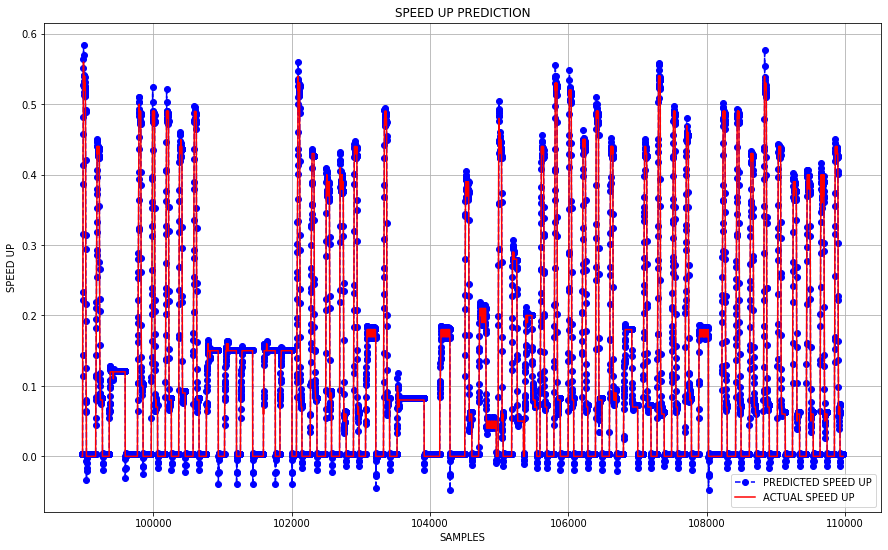


Training for NOISE UP with sequence length = 15



 10%|█         | 1/10 [00:01<00:13,  1.54s/it]

Train loss: 0.042019799549402714


 20%|██        | 2/10 [00:03<00:12,  1.53s/it]

Train loss: 0.030293545500895438


 30%|███       | 3/10 [00:04<00:10,  1.54s/it]

Train loss: 0.030313688032902887


 40%|████      | 4/10 [00:06<00:09,  1.53s/it]

Train loss: 0.030588957212341145


 50%|█████     | 5/10 [00:07<00:07,  1.53s/it]

Train loss: 0.0302507531175677


 60%|██████    | 6/10 [00:09<00:06,  1.53s/it]

Train loss: 0.030206892870358527


 70%|███████   | 7/10 [00:10<00:04,  1.53s/it]

Train loss: 0.030156992150342992


 80%|████████  | 8/10 [00:12<00:03,  1.53s/it]

Train loss: 0.03017647809118351


 90%|█████████ | 9/10 [00:13<00:01,  1.53s/it]

Train loss: 0.03009125161435372


100%|██████████| 10/10 [00:15<00:00,  1.53s/it]

Train loss: 0.030251056129001048



MSE loss in sample NOISE UP: 30.693117141723633
MSE loss out of sample NOISE UP: 32.76249313354492



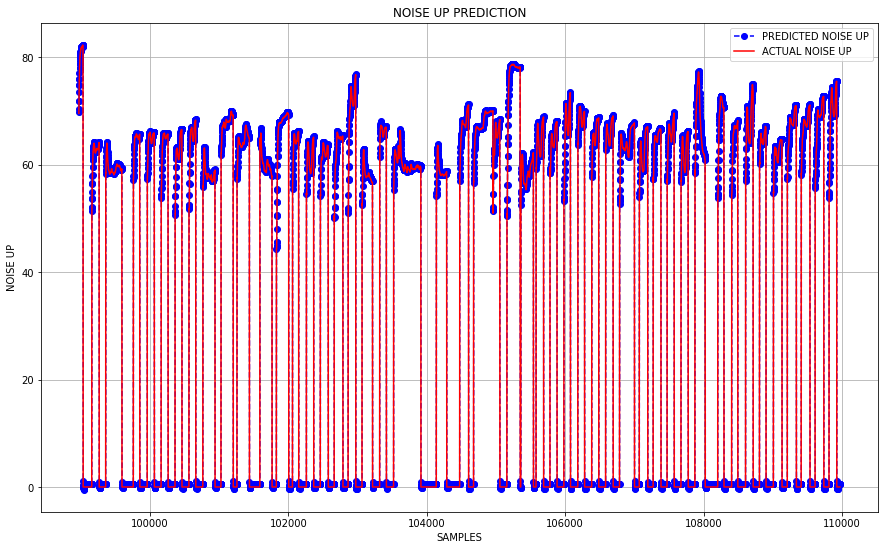


Training for PRESSURE UP with sequence length = 15



 10%|█         | 1/10 [00:01<00:13,  1.52s/it]

Train loss: 0.04432264381359501


 20%|██        | 2/10 [00:03<00:12,  1.52s/it]

Train loss: 0.0295049968638544


 30%|███       | 3/10 [00:04<00:10,  1.53s/it]

Train loss: 0.02947820267102423


 40%|████      | 4/10 [00:06<00:09,  1.53s/it]

Train loss: 0.029501944822698814


 50%|█████     | 5/10 [00:07<00:07,  1.54s/it]

Train loss: 0.029476758464834323


 60%|██████    | 6/10 [00:09<00:06,  1.75s/it]

Train loss: 0.029437218196888243


 70%|███████   | 7/10 [00:11<00:05,  1.77s/it]

Train loss: 0.02938544234162099


 80%|████████  | 8/10 [00:13<00:03,  1.70s/it]

Train loss: 0.029481139561191933


 90%|█████████ | 9/10 [00:14<00:01,  1.65s/it]

Train loss: 0.02937883781677361


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]

Train loss: 0.029350132739326833



MSE loss in sample PRESSURE UP: 3.235415458679199
MSE loss out of sample PRESSURE UP: 3.688917398452759



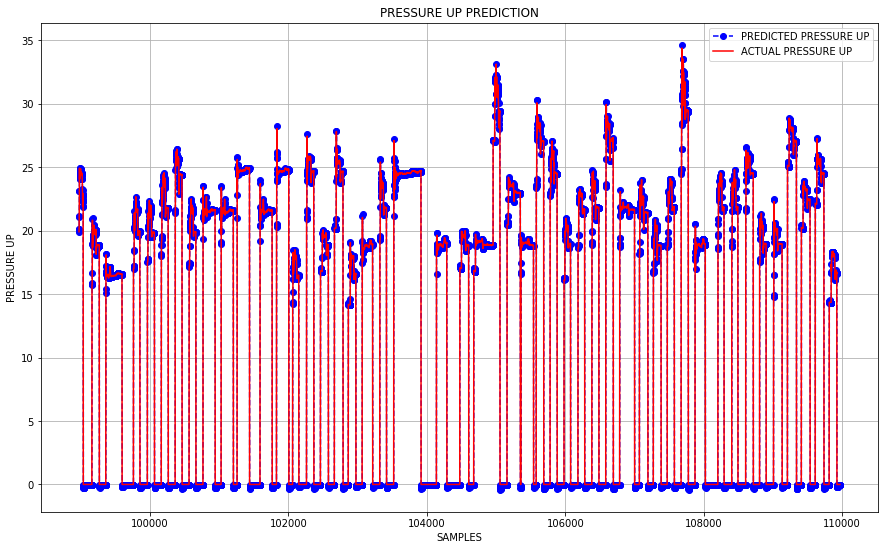


Training for SPEED DOWN with sequence length = 15



 10%|█         | 1/10 [00:01<00:13,  1.51s/it]

Train loss: 0.02403614449525945


 20%|██        | 2/10 [00:03<00:12,  1.52s/it]

Train loss: 0.009224584181155307


 30%|███       | 3/10 [00:04<00:10,  1.53s/it]

Train loss: 0.00903941396303783


 40%|████      | 4/10 [00:06<00:09,  1.53s/it]

Train loss: 0.009112394784393092


 50%|█████     | 5/10 [00:07<00:07,  1.55s/it]

Train loss: 0.008989471336947007


 60%|██████    | 6/10 [00:09<00:06,  1.55s/it]

Train loss: 0.009103709152142833


 70%|███████   | 7/10 [00:10<00:04,  1.56s/it]

Train loss: 0.009125521589934349


 80%|████████  | 8/10 [00:12<00:03,  1.56s/it]

Train loss: 0.008971585132132311


 90%|█████████ | 9/10 [00:13<00:01,  1.56s/it]

Train loss: 0.009013462779596472


100%|██████████| 10/10 [00:15<00:00,  1.55s/it]

Train loss: 0.009050528925256346



MSE loss in sample SPEED DOWN: 0.00013797103019896895
MSE loss out of sample SPEED DOWN: 0.0001304532925132662



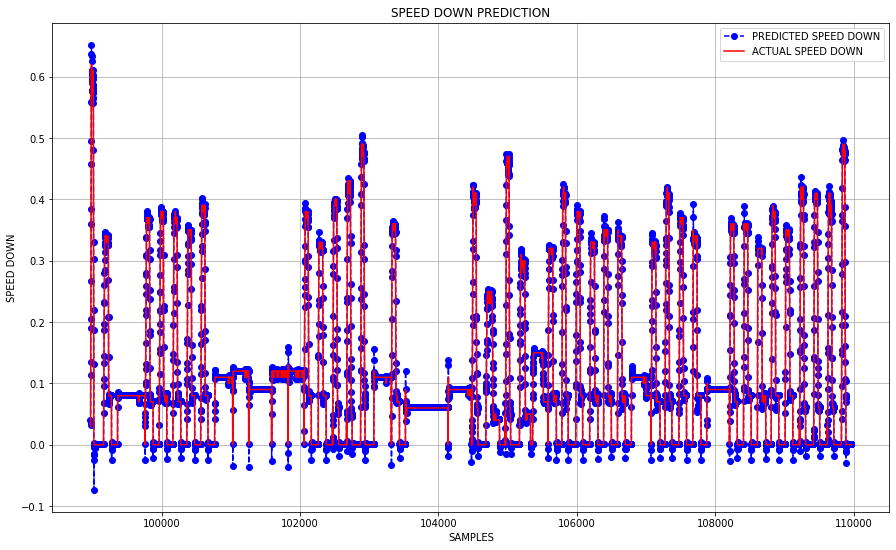


Training for NOISE DOWN with sequence length = 15



 10%|█         | 1/10 [00:01<00:14,  1.56s/it]

Train loss: 0.05573710049410051


 20%|██        | 2/10 [00:03<00:12,  1.56s/it]

Train loss: 0.028841107923733813


 30%|███       | 3/10 [00:04<00:11,  1.59s/it]

Train loss: 0.02910897279338366


 40%|████      | 4/10 [00:06<00:09,  1.57s/it]

Train loss: 0.028904536246134913


 50%|█████     | 5/10 [00:07<00:07,  1.56s/it]

Train loss: 0.028786408668314393


 60%|██████    | 6/10 [00:09<00:06,  1.55s/it]

Train loss: 0.02894694246823528


 70%|███████   | 7/10 [00:10<00:04,  1.55s/it]

Train loss: 0.028774667936252014


 80%|████████  | 8/10 [00:12<00:03,  1.55s/it]

Train loss: 0.028817512626768054


 90%|█████████ | 9/10 [00:13<00:01,  1.54s/it]

Train loss: 0.028843644896470424


100%|██████████| 10/10 [00:15<00:00,  1.55s/it]

Train loss: 0.028765876395266128



MSE loss in sample NOISE DOWN: 23.78082847595215
MSE loss out of sample NOISE DOWN: 24.08651351928711



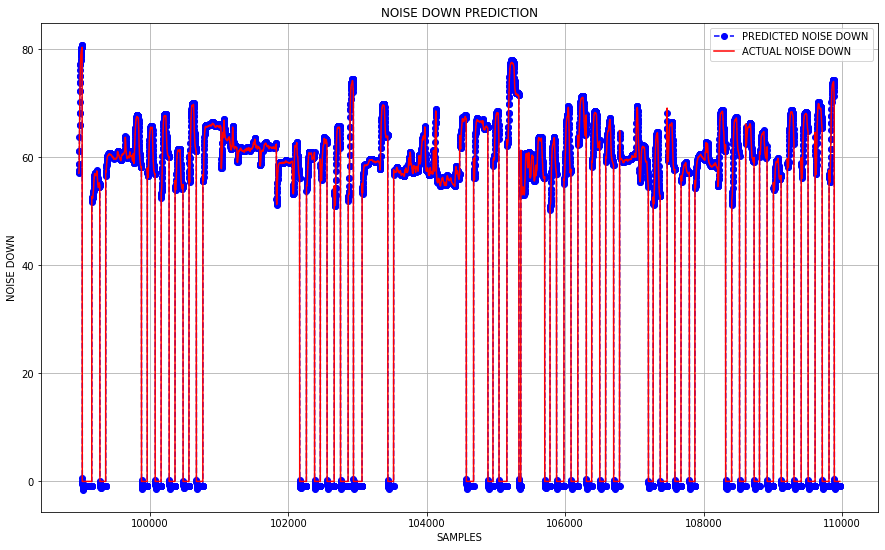


Training for PRESSURE DOWN with sequence length = 15



 10%|█         | 1/10 [00:01<00:13,  1.53s/it]

Train loss: 0.0485195470846003


 20%|██        | 2/10 [00:03<00:12,  1.57s/it]

Train loss: 0.03269995526055377


 30%|███       | 3/10 [00:04<00:10,  1.56s/it]

Train loss: 0.032548413026083495


 40%|████      | 4/10 [00:06<00:09,  1.56s/it]

Train loss: 0.03252721191273725


 50%|█████     | 5/10 [00:07<00:07,  1.55s/it]

Train loss: 0.032481213659337614


 60%|██████    | 6/10 [00:09<00:06,  1.55s/it]

Train loss: 0.032428421915761826


 70%|███████   | 7/10 [00:10<00:04,  1.55s/it]

Train loss: 0.03237513389533768


 80%|████████  | 8/10 [00:12<00:03,  1.55s/it]

Train loss: 0.0324979424709755


 90%|█████████ | 9/10 [00:13<00:01,  1.55s/it]

Train loss: 0.032575989969646404


100%|██████████| 10/10 [00:15<00:00,  1.55s/it]

Train loss: 0.03248733930558486



MSE loss in sample PRESSURE DOWN: 2.551541805267334
MSE loss out of sample PRESSURE DOWN: 2.832034111022949



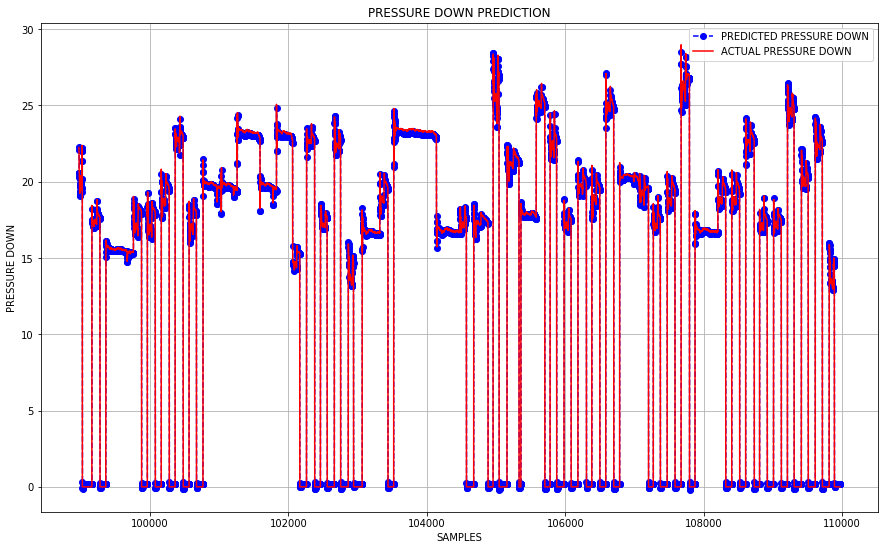

In [ ]:
for feature in feature_types:
    with open(f"nn_logs_{feature}.txt",'w',encoding = 'utf-8') as f:
        seq_losses = []
        for i, seq_len in enumerate(seq_lengths, start=1):
            # Get the feature of interest
            time_series = df_cleaned[feature]
            data = time_series.to_numpy()

            # Define the Sequence length
            seq_length = seq_len
            # Get train and test data
            train_ts = data[0:int(9 * time_series.shape[0] / 10)]            
            test_ts = data[(int(9 * time_series.shape[0] / 10) - seq_length):]

            # Get mean and std od training data
            mean = np.mean(train_ts)
            std = np.std(train_ts)

            # Get the device
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

            # Define the hyperparameters
            num_epochs = 10
            batch_size = 128
            ln_rate = 0.001
            num_hidden_units = 32

            # Create train and test datasets
            train_dataset = KleemannDataset(train_ts, seq_length=seq_length, mean=mean, std=std)
            test_dataset = KleemannDataset(test_ts, seq_length=seq_length, mean=mean, std=std)

            # Create dataloaders
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            test_loader_in_sample = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
            
            # Initialize the model ,place it to device and set it to train mode
            nn_model = RegressionNN(device=device, seq_length=seq_length, hidden_units=num_hidden_units)
            nn_model.to(device)
            nn_model.train()

            # Define loss function and optimizer 
            loss_function = nn.MSELoss()
            optimizer = torch.optim.Adam(nn_model.parameters(), lr=ln_rate)

            print(f"\nTraining for {feature} with sequence length = {seq_length}\n")

            # Training Loop
            for epoch in tqdm(range(num_epochs), total=num_epochs):
                epoch_loss = 0
                for X, y in train_loader:
                    
                    # Place the training sample to device
                    X_dev = X.to(device)
                    y_dev = y.unsqueeze(1).to(device)
                    
                    # Get the prediction and calculate the loss
                    prediction = nn_model(X_dev)
                    loss = loss_function(prediction, y_dev)
                    
                    # Backpropagation and weights update
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                    # Add the loss
                    epoch_loss += loss.item()
                
                num_batches = len(train_loader)
                avg_loss = epoch_loss / num_batches
                print(f"Train loss: {avg_loss}")
            
            # Save the model
            model_path = f"nn_{feature}_{epoch+1}.pth"
            # torch.save(nn_model.state_dict(), model_path)

            # Calculate out of sample predictions
            outofsample_preds = torch.tensor([]).to(device)
            ground = torch.tensor([]).to(device)
            nn_model.eval()
            with torch.inference_mode():
                for X, y in test_loader:
                    X_dev = X.to(device)
                    y_dev = y.unsqueeze(1).to(device)
                    prediction = nn_model(X_dev)
                    y_unnorm = y_dev * std + mean
                    prediction_unnorm = prediction * std + mean
                    outofsample_preds = torch.cat((outofsample_preds, prediction_unnorm), 0)
                    ground = torch.cat((ground, y_unnorm), 0)

            # Calculate insample predictions
            insample_preds = torch.tensor([]).to(device)
            inground = torch.tensor([]).to(device)
            nn_model.eval()
            with torch.inference_mode():
                for X, y in test_loader_in_sample:
                    X_dev = X.to(device)
                    y_dev = y.unsqueeze(1).to(device)
                    prediction = nn_model(X_dev)
                    y_unnorm = y_dev * std + mean
                    prediction_unnorm = prediction * std + mean
                    insample_preds = torch.cat((insample_preds, prediction_unnorm), 0)
                    inground = torch.cat((inground, y_unnorm), 0)
            
            # Write losses in .txt file
            avg_loss_in = loss_function(inground, insample_preds).item()
            msg = f'\nMSE loss in sample {feature}: {str(avg_loss_in)}\n'
            # f.write(msg)
            print(f'\nMSE loss in sample {feature}: {avg_loss_in}')

            avg_loss_out = loss_function(ground, outofsample_preds).item()
            msg = f'MSE loss out of sample {feature}: {str(avg_loss_out)}\n'
            # f.write(msg)
            print(f'MSE loss out of sample {feature}: {avg_loss_out}\n')
            f.write(f"{i}: {avg_loss_out}\n")

            seq_losses.append(avg_loss_out)

            # Plot insample and out of sample predictions
            # plt.figure(figsize=(15, 9))
            # plt.grid(True)
            # plt.plot(inground.cpu(), 'r')
            # plt.plot(insample_preds.cpu(), 'b', marker='o', linestyle='dashed')
            # plt.title(f"NN in-sample predictions for {feature}")
            # plt.legend(['training data', 'predictions'])
            # fname= f'nn_{feature}_insample.png'
            # plt.savefig(fname)
            # plt.show()

            to_row = int(len(df_cleaned)*0.9)
            sample_range = df_cleaned[to_row:].index
            sample_range = torch.tensor(sample_range[:-1]).cpu()

            plt.figure(figsize=(15, 9))
            plt.grid(True)
            plt.plot(sample_range, outofsample_preds.cpu(), 'b', marker='o', linestyle='dashed')
            plt.plot(sample_range, ground.cpu(), 'r')
            plt.title(f"{feature} PREDICTION")
            plt.xlabel("SAMPLES")
            plt.ylabel(feature)
            plt.legend([f'PREDICTED {feature}', f'ACTUAL {feature}'])
            fname= f'nn_{feature}_predictions.png'
            plt.savefig(fname)
            plt.show()

    # plt.figure(figsize=(15, 9))
    # plt.grid(True)
    # plt.plot(range(1,21), seq_losses)
    # plt.title(f"NN out-of-sample loss - sequence length for {feature}")
    # plt.xlabel("Sequence Length")
    # plt.ylabel("Mean Squared Error")
    # plt.legend(['losses'])
    # fname = f'nn_{feature}_losses_seq_lengths.png'
    # plt.savefig(fname)
    # plt.show()
